# Matplotlib - 여러개의 차트 비교

In [1]:
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib
# 런타임 > 런타임 다시 시작 클릭

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumBarunGothic')

### 1. subplot

In [2]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)
def g(t):
    return np.sin(np.pi*t)

In [3]:
t1 = np.arange(0.0, 5.01, 0.01)
t2 = np.arange(0.0, 5.01, 0.01)

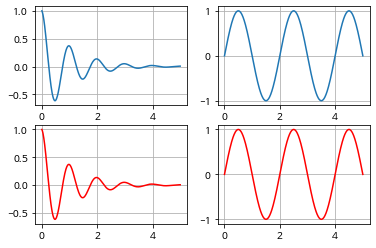

In [18]:
plt.subplot(2, 2, 1)        # 행의 갯수, 열의 갯수, 순서(1부터 시작)
plt.plot(t1, f(t1)); plt.grid()

plt.subplot(2, 2, 2)
plt.plot(t2, g(t2)); plt.grid()

plt.subplot(223)
plt.plot(t1, f(t1), 'r-'); plt.grid()

plt.subplot(224)
plt.plot(t2, g(t2), 'r-'); plt.grid()

plt.show()

### 2. subplots

#### Anscombe's Quartet
- 선형회귀선: y = 3.0 + 0.5 * x

In [8]:
ans = sns.load_dataset('anscombe')
ans.shape

(44, 3)

In [9]:
ans.head(3)

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58


In [10]:
ds1 = ans[ans.dataset == 'I']
ds1

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


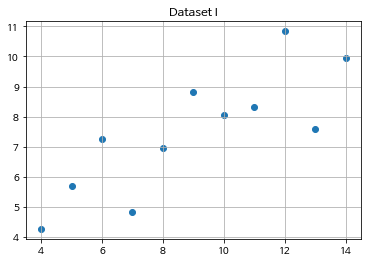

In [12]:
plt.scatter(ds1.x, ds1.y)
plt.title('Dataset I')
plt.grid()
plt.show()

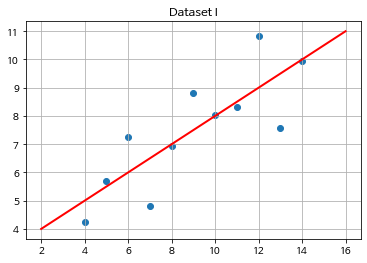

In [13]:
plt.scatter(ds1.x, ds1.y)
plt.plot([2,16], [4,11], 'r-', lw=2)
plt.title('Dataset I')
plt.grid()
plt.show()

- 4개의 데이터 셋

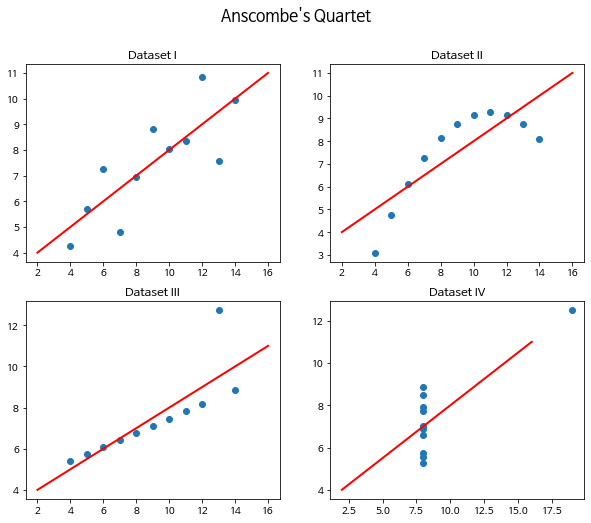

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(10,8))

for index, roman in enumerate(['I','II','III','IV']):
    ds = ans[ans.dataset == roman]
    ax = axes[index//2, index%2]
    ax.scatter(ds.x, ds.y)
    ax.plot([2,16], [4,11], 'r-', lw=2)
    ax.set_title(f'Dataset {roman}')

plt.suptitle("Anscombe's Quartet", fontsize=16)
plt.show()

- 그림을 세련되게

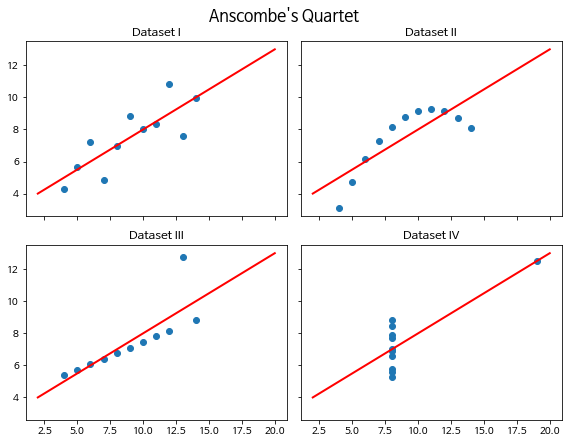

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(8,6), sharex=True, sharey=True)

for index, roman in enumerate(['I','II','III','IV']):
    ds = ans[ans.dataset == roman]
    ax = axes[index//2, index%2]
    ax.scatter(ds.x, ds.y)
    ax.plot([2,20], [4,13], 'r-', lw=2)
    ax.set_title(f'Dataset {roman}')

plt.suptitle("Anscombe's Quartet", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()